# Objectives:
We need to build medical vocabulary (word dictionary) for spelling checker. The following dataset was found useful for building vocab:(https://www.kaggle.com/datasets/jpmiller/layoutlm/data)

Before building the vocab, the following questions needs to be clarified:
1. What the dataset contains (EDA)?
2. Which feature needed?
3. What is the expected outcome?

Once, these questions are clarified, we can proceed building a custom NLTK corpus.

In [1]:
import pandas as pd
from nltk import RegexpTokenizer
from nltk.tokenize import word_tokenize
import statistics

from nltk.translate.bleu_score import corpus_bleu

from app_config import Configuration

In [2]:
df = pd.read_csv('data/medquad-kaggle-johnm.csv')

In [3]:
df.shape

(16412, 4)

In [4]:
df.head(2)

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma


In [3]:
df['focus_area'].value_counts()

focus_area
Breast Cancer                                                           53
Prostate Cancer                                                         43
Stroke                                                                  35
Skin Cancer                                                             34
Alzheimer's Disease                                                     30
                                                                        ..
Osteogenesis imperfecta Levin type                                       1
Ichthyosis, leukocyte vacuoles, alopecia, and sclerosing cholangitis     1
Ichthyosis hystrix, Curth Macklin type                                   1
Reticuloendotheliosis                                                    1
Autosomal dominant intermediate Charcot-Marie-Tooth disease type E       1
Name: count, Length: 5126, dtype: int64

In [4]:
df[df['focus_area'] == 'Causes of Diabetes']

,question,answer,source,focus_area
15243,What is (are) Causes of Diabetes ?,Diabetes is a complex group of diseases with a...,NIDDK,Causes of Diabetes
15244,What causes Causes of Diabetes ?,Type 1 diabetes is caused by a lack of insulin...,NIDDK,Causes of Diabetes
15245,What causes Causes of Diabetes ?,Type 2 diabetesthe most common form of diabete...,NIDDK,Causes of Diabetes
15246,What causes Causes of Diabetes ?,Insulin Resistance and Beta Cell Dysfunction\n...,NIDDK,Causes of Diabetes
15247,What causes Causes of Diabetes ?,Other types of diabetes have a variety of poss...,NIDDK,Causes of Diabetes
15248,What causes Causes of Diabetes ?,Other types of diabetes have a variety of poss...,NIDDK,Causes of Diabetes
15249,What to do for Causes of Diabetes ?,- Diabetes is a complex group of diseases with...,NIDDK,Causes of Diabetes
15342,What is (are) Causes of Diabetes ?,Diabetes is a complex group of diseases with a...,NIDDK,Causes of Diabetes
15343,What causes Causes of Diabetes ?,Type 1 diabetes is caused by a lack of insulin...,NIDDK,Causes of Diabetes
15344,What causes Causes of Diabetes ?,Type 2 diabetesthe most common form of diabete...,NIDDK,Causes of Diabetes


## 1. What the dataset contains?
We need a corpus that contains medical words for building a medical dictionary (vocab). Therefore, we need to investigate whether the obtained corpus contains the required.

In [5]:
# Let's investigate the data types and columns in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16412 entries, 0 to 16411
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    16412 non-null  object
 1   answer      16407 non-null  object
 2   source      16412 non-null  object
 3   focus_area  16398 non-null  object
dtypes: object(4)
memory usage: 513.0+ KB


In [6]:
# It appears there are four columns, and all columns contains string datatype.
# Let's investigate which column will be more sensible for building the vocab.
df.describe()

,question,answer,source,focus_area
count,16412,16407,16412,16398
unique,14984,15817,9,5126
top,What causes Causes of Diabetes ?,This condition is inherited in an autosomal re...,GHR,Breast Cancer
freq,20,348,5430,53


Logically assumption: average length of answers should be greater than questions; means, more texts in answers column. \
Let's investigate the assumption.


In [7]:
# The following function returns token count for given text, it will be used for calculating
# average tokens for questions & answers.
def token_count(x):
    return len(word_tokenize(x))

Before we use the word_tokenizer to count the tokens in each column, we need to drop the missing values to avoid exceptions.

In [8]:
# Let's find out the missing values first.
df.isnull().sum()

question       0
answer         5
source         0
focus_area    14
dtype: int64

In [9]:
# From the above we can conclude, question column doesn't have missing values meanwhile, answer column have 5.
cnt = df['question'].apply(token_count).sum()
print(f'Questions have {cnt} count of tokens.')

Questions have 146185 count of tokens.


In [10]:
# Drop only rows with missing values on the answer columns.
df = df[df['answer'].notna()]

cnt = df['answer'].apply(token_count).sum()
print(f'Answers have {cnt} count of tokens.')

Answers have 3731909 count of tokens.


## 2. Which feature needed?
In the EDA, two columns (question & answer) from the dataset was expected to have the required texts to build the vocab. For that, a hypothesis made that the answer column would have longer text than question column. The hypothesis was true, and therefore, the text from the answer column will be preprocessed for building the corpus.

In the preprocessing to build the vocab, we need to:
1. Clean the text from answer column - only words (others are stripped)
2. Get lemma for each words to avoid redundant word with the same meaning
3. Only include unique words into vocab

In [11]:
from importlib import reload
# 1. Clean the text from answer column - only words (others are stripped)
from nltk.corpus import stopwords
import utils.regex as rx

reload(rx)

# Acquire the stop words from NLTK corpus.
stop_words = stopwords.words('english')

# To store all the processed tokens.
corpus_token_list = []

# Tracing value for debugging.
i = 0
token_cnt = 0
filtered_token_cnt = 0
cleanse_data = pd.DataFrame(columns=['row', 'original', 'cleansed'])
try:
    for text in df['answer']:
        # Remove URLs.
        clean_text = rx.remove_url(text)
        # # Remove HTML tags.
        clean_text = rx.remove_html(clean_text)
        # # Remove bracketed words (usually acronyms).
        clean_text = rx.remove_bracketed_text(clean_text)
        # Transform contradictions to full form first before removing stop words.
        clean_text = rx.transform_contractions(clean_text)
        # Get only words.
        clean_text = rx.get_words(clean_text.lower())
        # Remove all extra spaces.
        clean_text = rx.remove_extra_space(clean_text)
        # For tracing raw to cleanse.
        cleanse_data.loc[len(cleanse_data)] = [i, text, clean_text]
        # Tokenize the text.
        tokens = word_tokenize(clean_text)
        # Tracing unfiltered-token count.
        token_cnt += len(tokens)
        # Filter stop words.
        filtered_text = [w for w in tokens if not w.lower() in stop_words]
        # Tracing filtered-token count for debugging.
        filtered_token_cnt += len(filtered_text)
        # Add the filtered words into corpus token_list.
        corpus_token_list.append(filtered_text)
        # Tracing row-count for debugging.
        i += 1
except Exception as e:
    print(f'Exception {e} in {i}.')

print(f'Rows processed:[{i}], unfiltered tokens:[{token_cnt}], filtered tokens:[{filtered_token_cnt}]')
print(f'Corpus entry count:[{len(corpus_token_list)}].')

cleanse_data.to_csv('data/cleanse-data.csv', index=False)

Rows processed:[16407], unfiltered tokens:[3151455], filtered tokens:[1885840]
Corpus entry count:[16407].


In [12]:
cleanse_data.iloc[580:590]

,row,original,cleansed
580,580,Here are links to more information about P.A.D...,here are links to more information about p a d...
581,581,"Many Reasons for Abuse Drug abuse, whether pre...",many reasons for abuse drug abuse whether pres...
582,582,Addiction is a chronic disease in which a pers...,addiction is a chronic disease in which a pers...
583,583,Physical dependence is a normal process that c...,physical dependence is a normal process that c...
584,584,"A persons behavior, especially changes in beha...",a persons behavior especially changes in behav...
585,585,The prescription medications most commonly abu...,the prescription medications most commonly abu...
586,586,Medications affect older people differently th...,medications affect older people differently th...
587,587,Marijuana is the most abused illicit drug amon...,marijuana is the most abused illicit drug amon...
588,588,"Although under federal law, marijuana is illeg...",although under federal law marijuana is illega...
589,589,"Not always. Some warning signs, such as sleep ...",not always some warning signs such as sleep pr...


In [13]:
# TODO: 23-03-2025: Wrong word 'dressingsthese' appeared in the medical.txt. GIGO!

# 2. Get lemma for each words to avoid redundant word with the same meaning
from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# List for storing token's lemma.
corpus_lemma_list = []

# Tracing value for debugging.
i = 0
token_cnt = 0
filtered_token_cnt = 0
# normalized_data = pd.DataFrame(columns=['row', 'original', 'normalized'])
trace_list = []
for entry in corpus_token_list:
    entry_list = []
    for token in entry:
        normalized_token = lemmatizer.lemmatize(token)
        entry_list.append(normalized_token)

        # For tracing raw to cleanse.
        trace_list.append([i, token, normalized_token])
        # normalized_data.loc[len(normalized_data)] = [i, token, normalized_token]

        filtered_token_cnt += 1

    # Add entry (token for single answer) in the list for further processing.
    corpus_lemma_list.append(entry_list)
    i = i + 1

print(f'Rows processed:[{i}], filtered tokens:[{filtered_token_cnt}]')
print(f'Corpus entry count:[{len(corpus_token_list)}].')

normalized_data = pd.DataFrame(trace_list, columns=['row', 'original', 'normalized'])
normalized_data.to_csv('data/normalized-data.csv', index=False)

Rows processed:[16407], filtered tokens:[1885840]
Corpus entry count:[16407].


In [14]:
normalized_data.iloc[1780:1790]

,row,original,normalized
1780,15,pressure,pressure
1781,15,causes,cause
1782,15,causes,cause
1783,15,high,high
1784,15,blood,blood
1785,15,pressure,pressure
1786,15,include,include
1787,15,medical,medical
1788,15,conditions,condition
1789,15,chronic,chronic


In [15]:
# Upon random checking on the vocab, 'dressingsthese' was found. Further investigation was conducted to trace the outcome.
normalized_data[normalized_data['normalized'] =='dressingsthese']

,row,original,normalized
5141,32,dressingsthese,dressingsthese
5235,32,dressingsthese,dressingsthese


In [16]:
# The above indicates that the 'dressingsthese' word originated from the source. Let's find out with the row-id=32 from the source data.
s3 = df.iloc[32:33]['answer'].tolist()
print(s3)

["Older adults should limit their sodium (salt) intake to 1,500 mg a day. That's about 2/3 of a teaspoon of salt. Here are tips to reduce salt in your diet. - Buy fresh, plain frozen, or canned with no salt added vegetables. Choose foods packed in water instead of broth or salt.   -  Use fresh poultry, fish, and lean meat, rather than canned or processed types.  - Use herbs, spices, and salt-free seasoning blends in cooking and at the table.  - Cook rice, pasta, and hot cereal without salt. Cut back on instant or flavored rice, pasta, and cereal mixes, which usually have added salt.  - Choose convenience foods that are low in sodium. Cut back on frozen dinners, pizza, packaged mixes, canned soups or broths, and salad dressingsthese often have a lot of sodium.  - Rinse canned foods, such as tuna, to remove some sodium.  - When available, buy low- or reduced-sodium or no-salt-added versions of foods.   - Choose ready-to-eat breakfast cereals that are low in sodium.  Buy fresh, plain froz

In [17]:
# Upon investigation this was found to be GIGO.
s1 = cleanse_data[cleanse_data['row'] == 32]['original'].tolist()
print(s1)

["Older adults should limit their sodium (salt) intake to 1,500 mg a day. That's about 2/3 of a teaspoon of salt. Here are tips to reduce salt in your diet. - Buy fresh, plain frozen, or canned with no salt added vegetables. Choose foods packed in water instead of broth or salt.   -  Use fresh poultry, fish, and lean meat, rather than canned or processed types.  - Use herbs, spices, and salt-free seasoning blends in cooking and at the table.  - Cook rice, pasta, and hot cereal without salt. Cut back on instant or flavored rice, pasta, and cereal mixes, which usually have added salt.  - Choose convenience foods that are low in sodium. Cut back on frozen dinners, pizza, packaged mixes, canned soups or broths, and salad dressingsthese often have a lot of sodium.  - Rinse canned foods, such as tuna, to remove some sodium.  - When available, buy low- or reduced-sodium or no-salt-added versions of foods.   - Choose ready-to-eat breakfast cereals that are low in sodium.  Buy fresh, plain froz

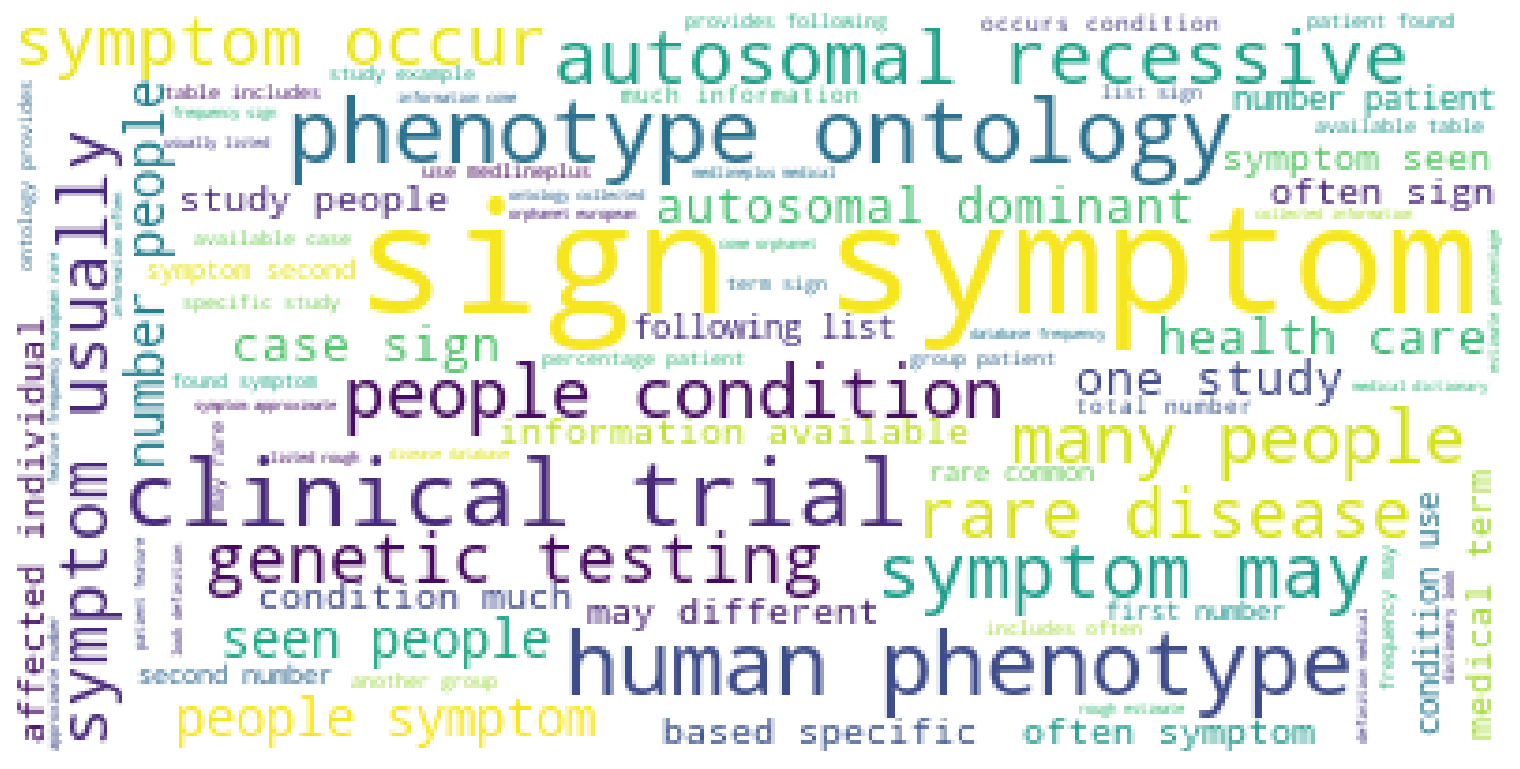

In [18]:
# Let's see the most frequent words in the vocab.
import wordcloud
import matplotlib.pyplot as plt

text = ''
for entry in corpus_lemma_list:
    for token in entry:
        text += ' ' + token

word_cloud = wordcloud.WordCloud(background_color='white').generate(text)
plt.figure(figsize=(15, 8), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [19]:
# 3. Only include unique words into vocab

# Final vocab to store the lemmas from the corpus.
vocab_list = []
for entry in corpus_lemma_list:
    for word in entry:
        if word not in vocab_list:
            vocab_list.append(word)
            
vocab_list = sorted(vocab_list, key=len)

print(f'Vocab entry count (unique words):[{len(vocab_list)}].')

Vocab entry count (unique words):[23319].


## 3. What is the expected outcome?
Now, we have the unique medical words stored in vocab and ready for creating a NLTK corpus for spelling checking.

In [20]:
# Save the vocab into custom NLTK corpus format.

import os

# Get corpus path from app config.
config = Configuration()

# Organize the vocab into custom folder.
corpus_dir = config.config_values['corpus_medical_dir']
if not os.path.exists(corpus_dir):
    os.makedirs(corpus_dir)

corpus_name = config.config_values['corpus_medical_name']
for i, text in enumerate(vocab_list):
    with open(os.path.join(corpus_dir, corpus_name), 'a', encoding='utf-8') as file:
        file.write(text + '\r\n')

In [21]:
# Load the custom NLTK corpus.
from nltk.corpus import PlaintextCorpusReader

# Step 3: Create an NLTK Corpus Reader
corpus = PlaintextCorpusReader(corpus_dir, '.*\.txt')

print(f'There are {len(corpus.words())} words in custom corpus.')

There are 23319 words in custom corpus.


In [22]:
# Testing: load the corpus and perform edit-distance for given real-word.
from nltk import edit_distance

test_word = 'glacoma'

if test_word not in corpus.words():
    print(f'Test word {test_word} not in corpus.')
    for w in corpus.words():
        m = edit_distance(test_word, w)
        if m == 1:
            print(f'Word {w} edit distance is {m}.')
            break
else:
    print(f'Test word {test_word} exists in corpus.')


Test word glacoma not in corpus.
Word glaucoma edit distance is 1.
